In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv('./data/proc_train.csv')
data

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,native-country,income,capital-margin,capital-total,capital-margin-flag,workclass-occupation,race-sex,marital-status-relationship,workclass-education,occupation-education
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,...,United-States,0.0,0,0,zero,Private# Machine-op-inspct,White Male,Divorced# Not-in-family,Private# 11th,Machine-op-inspct# 11th
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,...,United-States,0.0,-1721,1721,negative,Private# Other-service,White Female,Divorced# Not-in-family,Private# Some-college,Other-service# Some-college
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,...,Haiti,0.0,0,0,zero,Private# Handlers-cleaners,Asian-Pac-Islander Female,Never-married# Not-in-family,Private# Bachelors,Handlers-cleaners# Bachelors
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,...,United-States,0.0,0,0,zero,Private# Tech-support,White Female,Divorced# Not-in-family,Private# Assoc-voc,Tech-support# Assoc-voc
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,...,United-States,1.0,0,0,zero,Private# Transport-moving,White Male,Married-civ-spouse# Husband,Private# Some-college,Transport-moving# Some-college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,...,Puerto-Rico,0.0,0,0,zero,Private# Sales,Other Male,Never-married# Own-child,Private# HS-grad,Sales# HS-grad
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,...,United-States,0.0,0,0,zero,Private# Sales,Black Male,Never-married# Own-child,Private# HS-grad,Sales# HS-grad
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,...,United-States,0.0,0,0,zero,Self-emp-not-inc# Farming-fishing,White Male,Never-married# Own-child,Self-emp-not-inc# 10th,Farming-fishing# 10th
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,...,United-States,0.0,0,0,zero,Private# Craft-repair,White Male,Never-married# Not-in-family,Private# 11th,Craft-repair# 11th


In [88]:
data['race-sex']

0                        White Male
1                      White Female
2         Asian-Pac-Islander Female
3                      White Female
4                        White Male
                    ...            
29300                    Other Male
29301                    Black Male
29302                    White Male
29303                    White Male
29304                  White Female
Name: race-sex, Length: 29305, dtype: object

In [68]:
data['sex']

0           Male
1         Female
2         Female
3         Female
4           Male
          ...   
29300       Male
29301       Male
29302       Male
29303       Male
29304     Female
Name: sex, Length: 29305, dtype: object

In [69]:
data_se = data.iloc[ : , : 16]
data_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no              29305 non-null  int64  
 1   age             29305 non-null  int64  
 2   workclass       29305 non-null  object 
 3   fnlwgt          29305 non-null  int64  
 4   education       29305 non-null  object 
 5   education-num   29305 non-null  int64  
 6   marital-status  29305 non-null  object 
 7   occupation      29305 non-null  object 
 8   relationship    29305 non-null  object 
 9   race            29305 non-null  object 
 10  sex             29305 non-null  object 
 11  capital-gain    29305 non-null  int64  
 12  capital-loss    29305 non-null  int64  
 13  hours-per-week  29305 non-null  int64  
 14  native-country  29305 non-null  object 
 15  income          29305 non-null  float64
dtypes: float64(1), int64(7), object(8)
memory usage: 3.6+ MB


데이터의 종류
- 문자형 : 카테고리화 되어 있는 것 (시간, 날짜, 년도, 계절, 주말, 주일)
- 숫자형 : 연속적인 숫자 개념
구분
- 숫자형-숫자형
- 문자형-숫자형 (대부분의 경우) ==> boxplot
- hour (문자형) – count(숫자형)
- 문자형-문자형

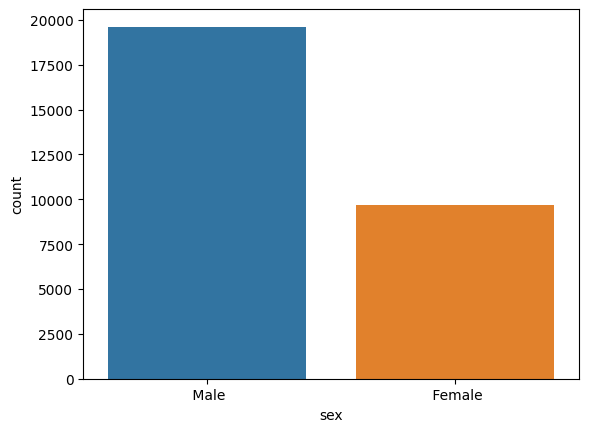

In [70]:
# 성별 몇개인지 확인
ax = sns.countplot( x = data_se['sex'],data = data_se)
plt.show()

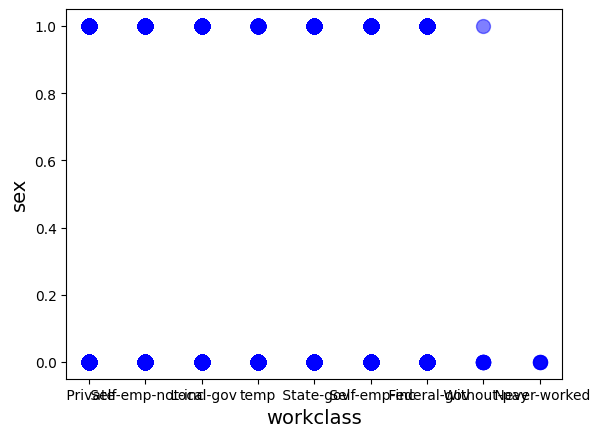

In [71]:

# Basic Scatter Plot

plt.plot('workclass',  # x
        'income',  # y
        data=data_se, 
        linestyle='none', 
        marker='o', 
        markersize=10,
        color='blue', 
        alpha=0.5)

plt.xlabel('workclass', fontsize=14)

plt.ylabel('sex', fontsize=14)

plt.show()

In [72]:
# 여성, 남성 비율을 구해보자.
pd.DataFrame(data_se['sex'].value_counts()/data_se['sex'].count())

,sex
Male,0.669544
Female,0.330456


In [73]:
new_sex = pd.DataFrame(data_se['sex'].value_counts()/data_se['sex'].count())
new_sex.reset_index(inplace = True)
new_sex

,index,sex
0,Male,0.669544
1,Female,0.330456


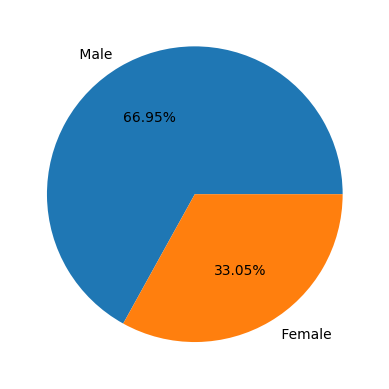

In [74]:
# 위 리스트를 갖고 파이 그래프를 그리기
plt.pie(x = list(new_sex['sex']), 
           labels = list(new_sex['index']),
           autopct = '%.2f%%')
plt.show()

범주형 변수 2개 이상 시각화 (변수간 관계 확인)

In [75]:
import numpy as np

<Axes: xlabel='sex', ylabel='fnlwgt'>

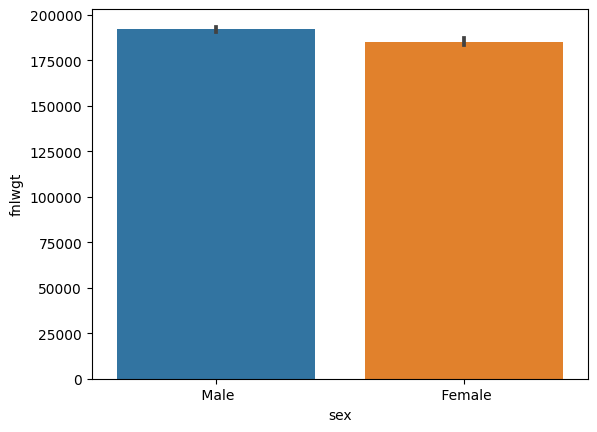

In [76]:
# x축엔 범주형데이터를 y축엔 범주값에 따른 데이터의 평균값이 구해지는 막대그래프이다.
# 지정한 변수의 평균을 계산하여 그림
# 데이터의 개수가 아닌 평균을 계산한다.

# 성별의 평균값
sns.barplot(x = 'sex', y = 'fnlwgt', data = data_se)

In [77]:
data_se['fnlwgt']

0        219199
1         52978
2        196899
3        135527
4         60783
          ...  
29300    100605
29301    372636
29302    258474
29303    157446
29304     94809
Name: fnlwgt, Length: 29305, dtype: int64

<Axes: xlabel='sex', ylabel='income'>

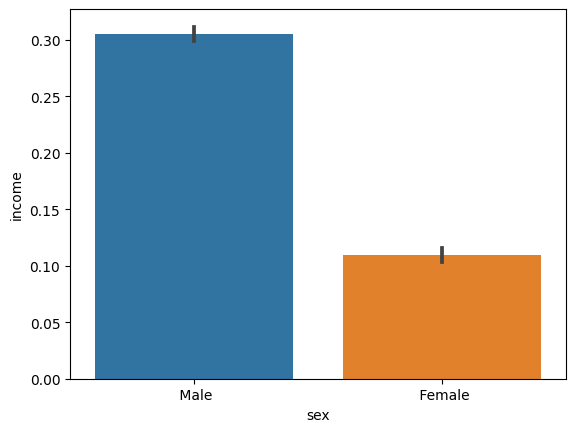

In [78]:
sns.barplot(x = 'sex', y = 'income', data = data_se)

<Axes: xlabel='sex'>

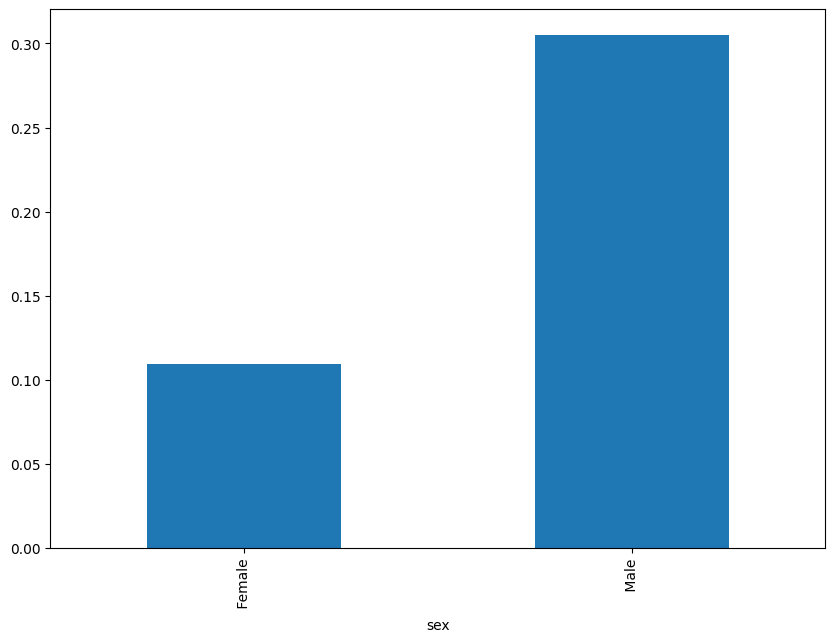

In [84]:
data_se.groupby('sex')['income'].mean().plot(kind='bar', figsize=(10,7))
# 어떤 조사에서는 그닥 특이사항이 없다고 나옴

In [79]:
data_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no              29305 non-null  int64  
 1   age             29305 non-null  int64  
 2   workclass       29305 non-null  object 
 3   fnlwgt          29305 non-null  int64  
 4   education       29305 non-null  object 
 5   education-num   29305 non-null  int64  
 6   marital-status  29305 non-null  object 
 7   occupation      29305 non-null  object 
 8   relationship    29305 non-null  object 
 9   race            29305 non-null  object 
 10  sex             29305 non-null  object 
 11  capital-gain    29305 non-null  int64  
 12  capital-loss    29305 non-null  int64  
 13  hours-per-week  29305 non-null  int64  
 14  native-country  29305 non-null  object 
 15  income          29305 non-null  float64
dtypes: float64(1), int64(7), object(8)
memory usage: 3.6+ MB


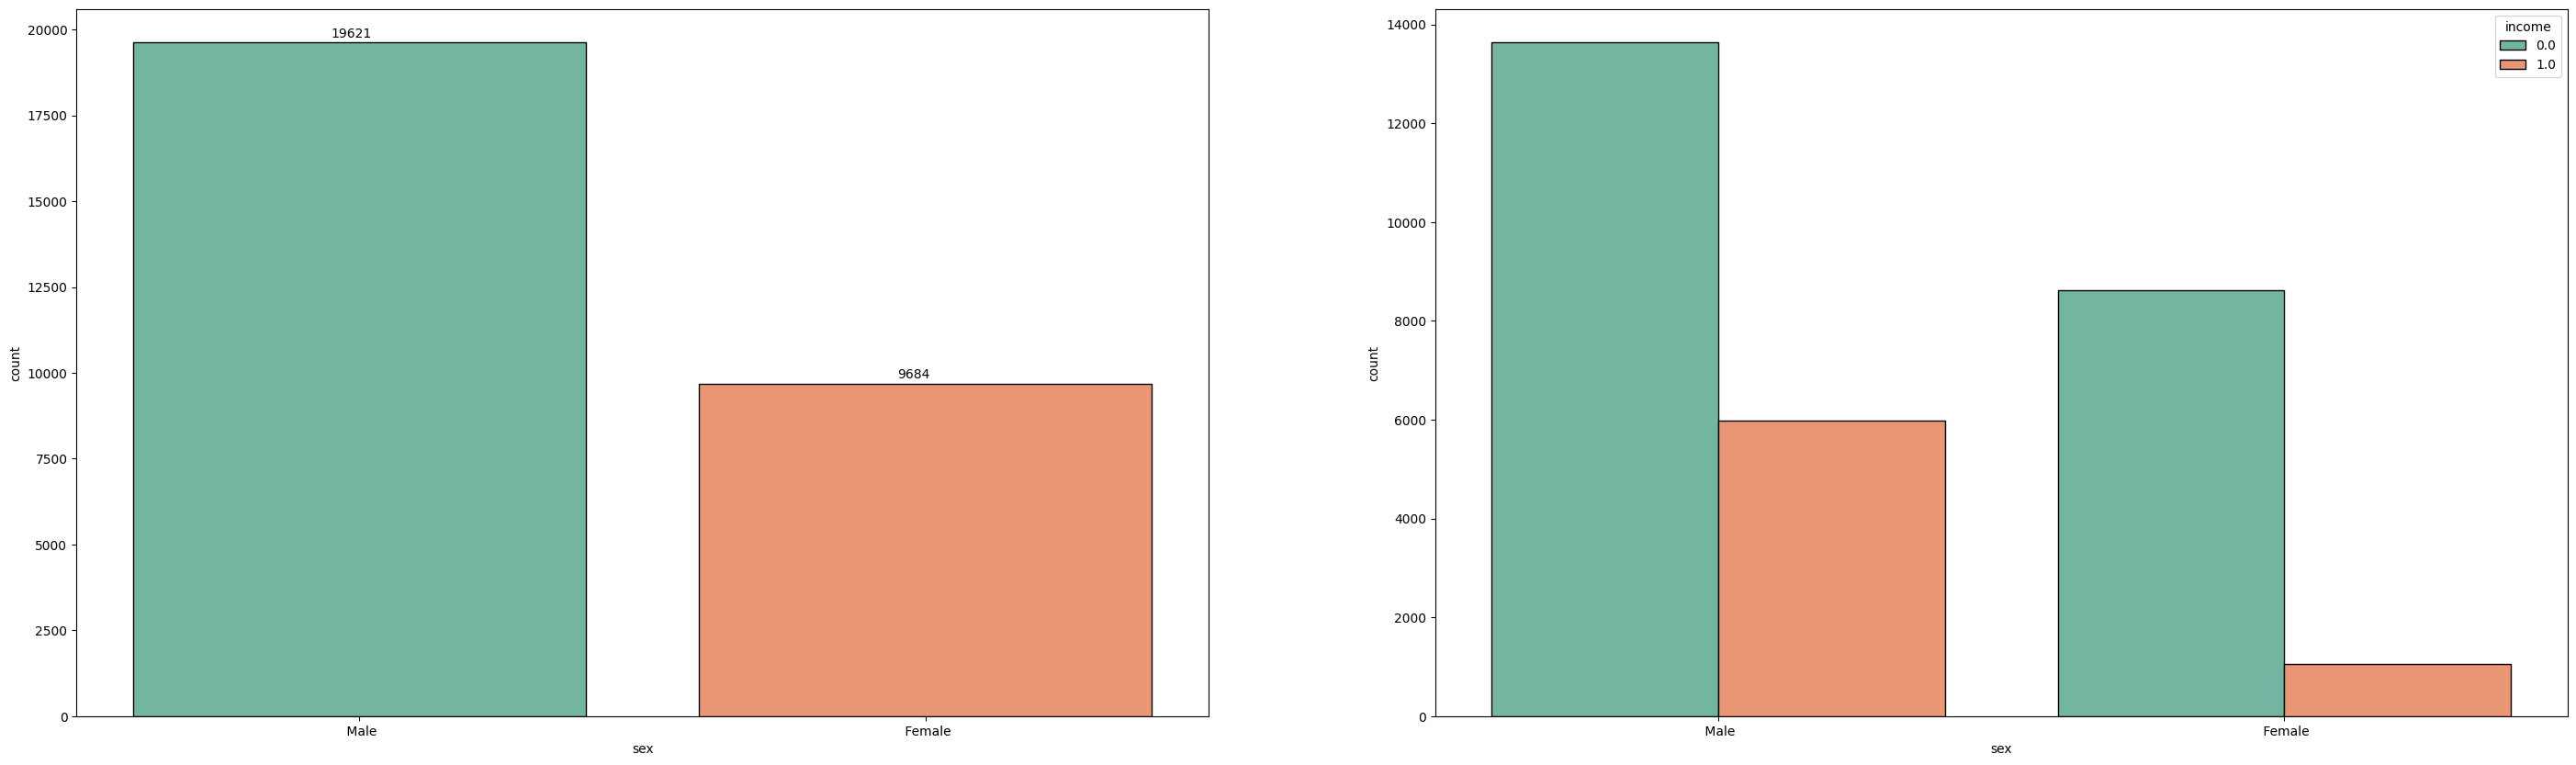

In [92]:
col = 'sex'

fig, ax = plt.subplots(1, 2, figsize=(35, 10))

#
value_counts = data_se[col].value_counts()

#
sns.countplot(x=col, data=data_se, palette="Set2", edgecolor='black', order = value_counts.index, ax=ax[0])
sns.countplot(x=col, hue='income', data=data_se, palette="Set2", edgecolor='black', order = value_counts.index, ax=ax[1])

for i, v in value_counts.reset_index().iterrows():
    ax[0].text(i-0.05, v[col]+150 , v[col])

In [95]:
col = 'income'

fig, ax = plt.subplots(1, 2, figsize=(50,25))

#
value_counts = data[col].value_counts()
# sns.barplot(x = 'sex', y = 'income', data = data_se)
#
sns.barplot(x=col, data=data, palette="Set2", edgecolor='black', order = value_counts.index, ax=ax[0])
sns.barplot(x=col, y='race-sex', data=data, palette="Set2", edgecolor='black', order = value_counts.index, ax=ax[1])

for i, v in value_counts.reset_index().iterrows():
    ax[0].text(i-0.05, v[col]+150 , v[col])

ValueError: Image size of 6901x43140235 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 5000x2500 with 2 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' White Male'),
  Text(1, 0, ' White Female'),
  Text(2, 0, ' Asian-Pac-Islander Female'),
  Text(3, 0, ' Black Female'),
  Text(4, 0, ' Amer-Indian-Eskimo Female'),
  Text(5, 0, ' Asian-Pac-Islander Male'),
  Text(6, 0, ' Black Male'),
  Text(7, 0, ' Other Male'),
  Text(8, 0, ' Other Female'),
  Text(9, 0, ' Amer-Indian-Eskimo Male')])

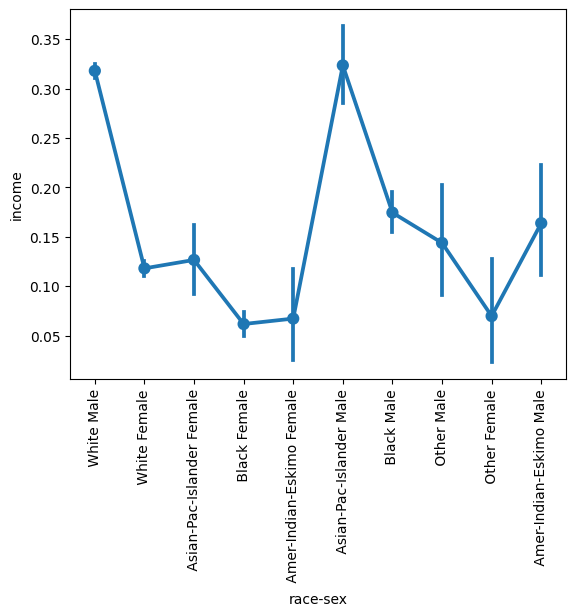

In [109]:
# X축 범주형 데이터 y축엔 범주에 따른 수치형 데이터의 평균값
#  income별 race-sex의 평균값
# 저 선은 신뢰구간이다.

sns.pointplot(x = 'race-sex', y = 'income', data = data)
plt.xticks(rotation = 90)

In [112]:
# 요일별 total_bill의 최댓값 
sns.pointplot(x = 'race-sex', y = 'income', data = data, estimator = np.valu)

AttributeError: module 'numpy' has no attribute 'counts'